In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [41]:
for x in inspector.get_columns('measurement'):
    print(x)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}


In [91]:
session.query(Measure.date).all()
session.query(Measure.date).order_by(Measure.date.desc()).distinct().all()

[('2017-08-23',),
 ('2017-08-22',),
 ('2017-08-21',),
 ('2017-08-20',),
 ('2017-08-19',),
 ('2017-08-18',),
 ('2017-08-17',),
 ('2017-08-16',),
 ('2017-08-15',),
 ('2017-08-14',),
 ('2017-08-13',),
 ('2017-08-12',),
 ('2017-08-11',),
 ('2017-08-10',),
 ('2017-08-09',),
 ('2017-08-08',),
 ('2017-08-07',),
 ('2017-08-06',),
 ('2017-08-05',),
 ('2017-08-04',),
 ('2017-08-03',),
 ('2017-08-02',),
 ('2017-08-01',),
 ('2017-07-31',),
 ('2017-07-30',),
 ('2017-07-29',),
 ('2017-07-28',),
 ('2017-07-27',),
 ('2017-07-26',),
 ('2017-07-25',),
 ('2017-07-24',),
 ('2017-07-23',),
 ('2017-07-22',),
 ('2017-07-21',),
 ('2017-07-20',),
 ('2017-07-19',),
 ('2017-07-18',),
 ('2017-07-17',),
 ('2017-07-16',),
 ('2017-07-15',),
 ('2017-07-14',),
 ('2017-07-13',),
 ('2017-07-12',),
 ('2017-07-11',),
 ('2017-07-10',),
 ('2017-07-09',),
 ('2017-07-08',),
 ('2017-07-07',),
 ('2017-07-06',),
 ('2017-07-05',),
 ('2017-07-04',),
 ('2017-07-03',),
 ('2017-07-02',),
 ('2017-07-01',),
 ('2017-06-30',),
 ('2017-06

In [96]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measure.date).order_by(Measure.date.desc()).first()
most_recent_date

('2017-08-23',)

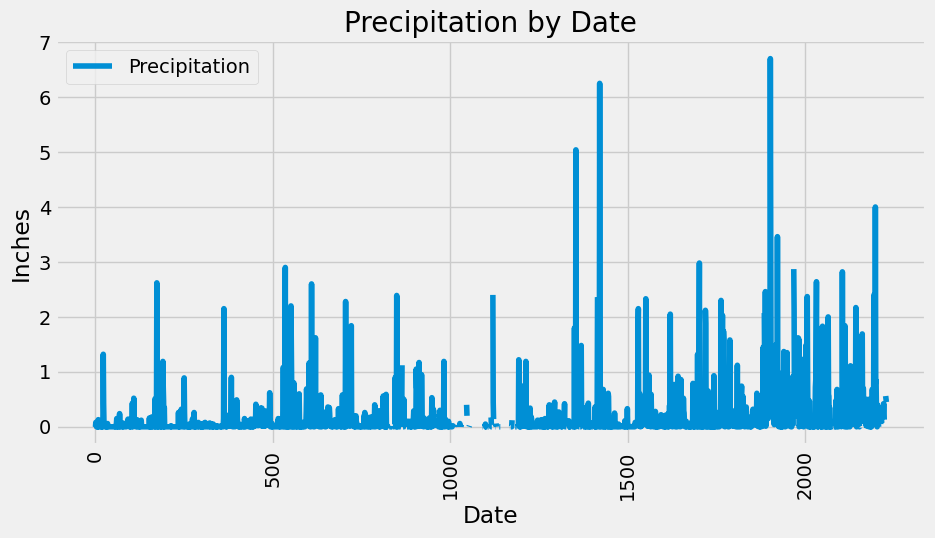

In [141]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_ago = most_recent_date - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
prcp = session.query(Measure.date, Measure.prcp).filter(Measure.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(prcp, columns = ["Date", "Precipitation"])
df.set_index("Date")

# Sort the dataframe by date
df.sort_values("Date")
df

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.line(figsize = (10,5), rot = 90)
plt.title("Precipitation by Date")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [134]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [122]:
for x in inspector.get_columns('station'):
    print(x)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}


In [126]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(Station.station).count()
print(f"The total number of stations is {stations}.")

The total number of stations is 9.


In [168]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_obs_count = session.query(Measure.station, func.count(Measure.station)).\
group_by(Measure.station).\
order_by(func.count(Measure.station).desc())

df = pd.DataFrame(station_obs_count, columns = ["Station", "Observation Count"])
df

# USC00519281 is the station with the most observations.

,Station,Observation Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [171]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
args = [Measure.station, func.min(Measure.tobs), func.max(Measure.tobs), func.avg(Measure.tobs)]
most_active = session.query(*args).filter(Measure.station == "USC00519281").all()
most_active

most_active = pd.DataFrame(most_active, columns = ["Station", "Min Temp", "Max Temp", "Avg Temp"])
most_active

,Station,Min Temp,Max Temp,Avg Temp
0,USC00519281,54.0,85.0,71.663781


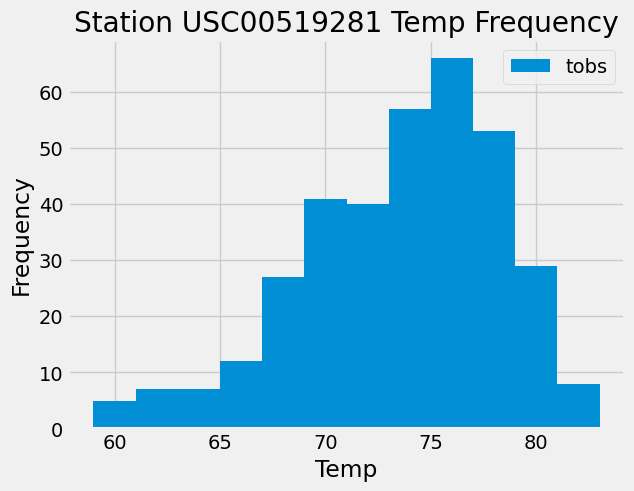

In [179]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temps = session.query(Measure.tobs).filter(Measure.date >= year_ago, Measure.station == "USC00519281").all()
year_temps_df = pd.DataFrame(year_temps)
year_temps_df

year_temps_df.plot.hist(bins = 12)
plt.title("Station USC00519281 Temp Frequency")
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [180]:
# Close Session
session.close()